In [2]:
# Create GAN for independent and identically distributed data

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import secrets


class GAN:
    def __init__(self, P = 0.75, seq_len=100, latent_dim = 50):
        
        self.P = P
        self.seq_len = seq_len
        self.latent_dim = latent_dim
        seed = secrets.randbits(128)
        self.rng = np.random.default_rng(seed)
        self.build_generator()
        self.build_discriminator()
        self.build_gan()
        print(self.P)
    
    def generate_real_samples(self, n_samples):
        X = self.rng.binomial(1, self.P, (n_samples, self.seq_len)) 
        y = np.ones((n_samples, 1)) * 0.9
        return X, y
    
    def generate_fake_samples(self, n_samples):
        X = self.generator.predict(np.random.normal(0, 1, (n_samples, self.latent_dim)))
        y = np.zeros((n_samples, 1))
        return X, y
    
    def calculate_P(self, n_samples):
        X, _ = self.generate_fake_samples(n_samples)
        return np.mean(X)
    
    def build_generator(self):
        self.generator = tf.keras.models.Sequential([
            tf.keras.layers.Dense(self.seq_len * 200, input_shape=(self.latent_dim,)),
            tf.keras.layers.LeakyReLU(alpha=0.2),
            tf.keras.layers.Reshape((self.seq_len, 200)),
            tf.keras.layers.LSTM(100, return_sequences=True, activation='relu'),
            # tf.keras.layers.LSTM(100, return_sequences=True),
            # tf.keras.layers.LSTM(100, return_sequences=True),
            # tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1, activation='relu'),
            
        ])
    def summarize_generator(self):
        self.generator.summary()

    def build_discriminator(self):
        self.discriminator = tf.keras.models.Sequential([
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, input_shape=(self.seq_len, 1), return_sequences=True)),
            # tf.keras.layers.Dropout(0.5),
            # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True)),

            # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True)),
            # tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=False)),
            # tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(1, activation='sigmoid'),
        ])
        self.discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    def summarize_discriminator(self):
        self.discriminator.summary()
    
    def build_gan(self):
        self.discriminator.trainable = False
        self.gan = tf.keras.models.Sequential([
            self.generator,
            self.discriminator,
        ])
        self.gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam())
        
    def train(self, epochs = 10, batch_size = 128, data_size = 100000):
        l1_hist = []
        l2_hist = []
        l3_hist = []
        ac1_hist = []
        ac2_hist = []
        total = data_size//batch_size
        train_data_x, train_data_y = self.generate_real_samples(data_size)
        for i in range(epochs):
            print("Iteration:", i)
            # Train the discriminator
            
            for k in range(total):
                print(k,"/",total,end="\r")
                idx = np.random.randint(0, data_size, batch_size//2)
                X_real, y_real = train_data_x[idx], train_data_y[idx]
                X_fake, y_fake = self.generate_fake_samples(batch_size//2)
                

                l1, ac1 = self.discriminator.train_on_batch(X_real, y_real)
                l2, ac2 = self.discriminator.train_on_batch(X_fake, y_fake)
                
                X_fake = np.random.normal(0, 1, (batch_size, self.latent_dim))
                y_fake = np.ones((batch_size, 1))
                l3 = self.gan.train_on_batch(X_fake, y_fake)
                
                l1_hist.append(l1)
                l2_hist.append(l2)
                l3_hist.append(l3)
                ac1_hist.append(ac1)
                ac2_hist.append(ac2)
                
            # Show plots of the losses and accuracies
            calc_p = self.calculate_P(100000)
            print(calc_p)
            pred = gan.generator.predict(np.random.normal(0, 1, (1, 50)))
            print(pred)
            print(gan.discriminator.predict(pred))
            print("Loss:",np.mean(np.abs(calc_p - (self.P + 10))))
            if i % 10 >= 0:
                plt.figure(figsize=(10, 10))
                plt.subplot(2, 1, 1)
                plt.plot(l1_hist, label="Discriminator(Real)")
                plt.plot(l2_hist, label="Discriminator(Fake)")
                plt.plot(l3_hist, label="Generator")
                plt.legend()
                plt.title("Losses")
                plt.subplot(2, 1, 2)
                plt.plot(ac1_hist, label="Accuracy(Real)")
                plt.plot(ac2_hist, label="Accuracy(fake)")
                plt.legend()
                plt.title("Accuracies")
                plt.show()
                l1_hist = []
                l2_hist = []
                l3_hist = []
                ac1_hist = []
                ac2_hist = []

In [3]:
print("Hello")
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

Hello
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
print("DADAD")

DADAD


In [5]:
gan = GAN()
gan.summarize_generator()
gan.summarize_discriminator()

2024-02-16 04:19:48.146228: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-16 04:19:51.912065: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9626 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:83:00.0, compute capability: 7.5


0.75
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20000)             1020000   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 20000)             0         
                                                                 
 reshape (Reshape)           (None, 100, 200)          0         
                                                                 
 lstm (LSTM)                 (None, 100, 100)          120400    
                                                                 
 dense_1 (Dense)             (None, 100, 1)            101       
                                                                 
Total params: 1,140,501
Trainable params: 1,140,501
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
___________________

In [6]:
rng2 = np.random.default_rng()
print(rng2.binomial(1, 0.5, (4,4)) + 10)

[[11 11 11 10]
 [11 10 11 10]
 [11 10 10 10]
 [10 11 10 11]]


Iteration: 0


2024-02-16 04:20:13.309114: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8400
2024-02-16 04:20:13.693391: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x14b57c259fb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 04:20:13.693456: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-02-16 04:20:13.699126: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-16 04:20:13.891767: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


0.5785141
[[[0.7034985 ]
  [0.6954162 ]
  [0.75385386]
  [0.69402605]
  [0.6965305 ]
  [0.65805453]
  [0.72007483]
  [0.73728806]
  [0.818931  ]
  [0.89626026]
  [0.8924207 ]
  [0.87470853]
  [0.89155525]
  [0.9281062 ]
  [0.8946739 ]
  [0.86722463]
  [0.83404994]
  [0.8090657 ]
  [0.82072526]
  [0.78502965]
  [0.78627735]
  [0.7691881 ]
  [0.81441313]
  [0.8001639 ]
  [0.797598  ]
  [0.7815154 ]
  [0.78925   ]
  [0.828508  ]
  [0.8637562 ]
  [0.89023703]
  [0.8878709 ]
  [0.87391746]
  [0.8918069 ]
  [0.88973814]
  [0.8925533 ]
  [0.81494814]
  [0.81084734]
  [0.8330079 ]
  [0.7982412 ]
  [0.8491675 ]
  [0.8601756 ]
  [0.86417407]
  [0.87239873]
  [0.8486283 ]
  [0.8358916 ]
  [0.79776174]
  [0.8070128 ]
  [0.83497185]
  [0.8242263 ]
  [0.87863284]
  [0.9339224 ]
  [0.85395515]
  [0.89035517]
  [0.7704036 ]
  [0.8188146 ]
  [0.7630813 ]
  [0.69987935]
  [0.64473635]
  [0.567963  ]
  [0.546702  ]
  [0.5297084 ]
  [0.53154796]
  [0.53217727]
  [0.50734663]
  [0.49755144]
  [0.5011547 ]


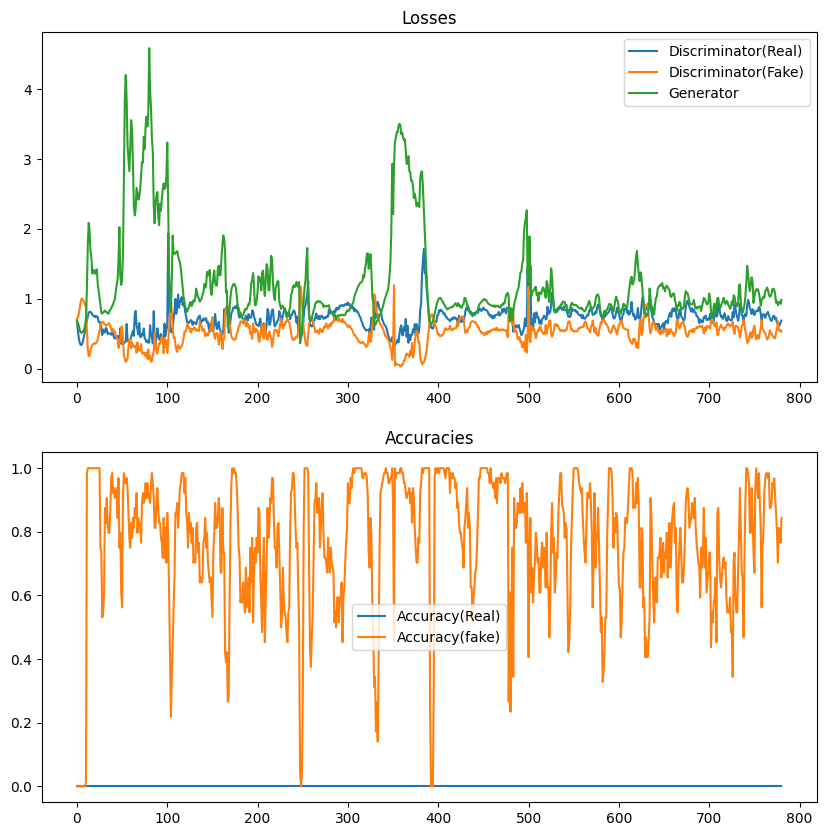

Iteration: 1
0.7412385
[[[1.008256  ]
  [0.975369  ]
  [0.9395652 ]
  [0.94968   ]
  [0.8575376 ]
  [0.800688  ]
  [0.71371734]
  [0.644724  ]
  [0.601644  ]
  [0.6024327 ]
  [0.60351884]
  [0.63552046]
  [0.68412274]
  [0.7241354 ]
  [0.73140335]
  [0.8049797 ]
  [0.7338462 ]
  [0.7761619 ]
  [0.7175461 ]
  [0.68349564]
  [0.64378625]
  [0.62513876]
  [0.61755306]
  [0.65525067]
  [0.6798992 ]
  [0.700961  ]
  [0.7911414 ]
  [0.81195414]
  [0.8496189 ]
  [0.7928742 ]
  [0.7692423 ]
  [0.79368854]
  [0.7428111 ]
  [0.7556112 ]
  [0.71317613]
  [0.6890141 ]
  [0.74084485]
  [0.69091773]
  [0.72282135]
  [0.810606  ]
  [0.88343644]
  [0.8137059 ]
  [0.7866423 ]
  [0.7238864 ]
  [0.690776  ]
  [0.6830379 ]
  [0.71722424]
  [0.7818841 ]
  [0.76984644]
  [0.8422029 ]
  [0.8538133 ]
  [0.8414204 ]
  [0.80804396]
  [0.77502203]
  [0.74514675]
  [0.68339723]
  [0.6888615 ]
  [0.722942  ]
  [0.777377  ]
  [0.9108807 ]
  [0.96853507]
  [0.95653474]
  [1.0863795 ]
  [1.0125849 ]
  [0.96054626]
  

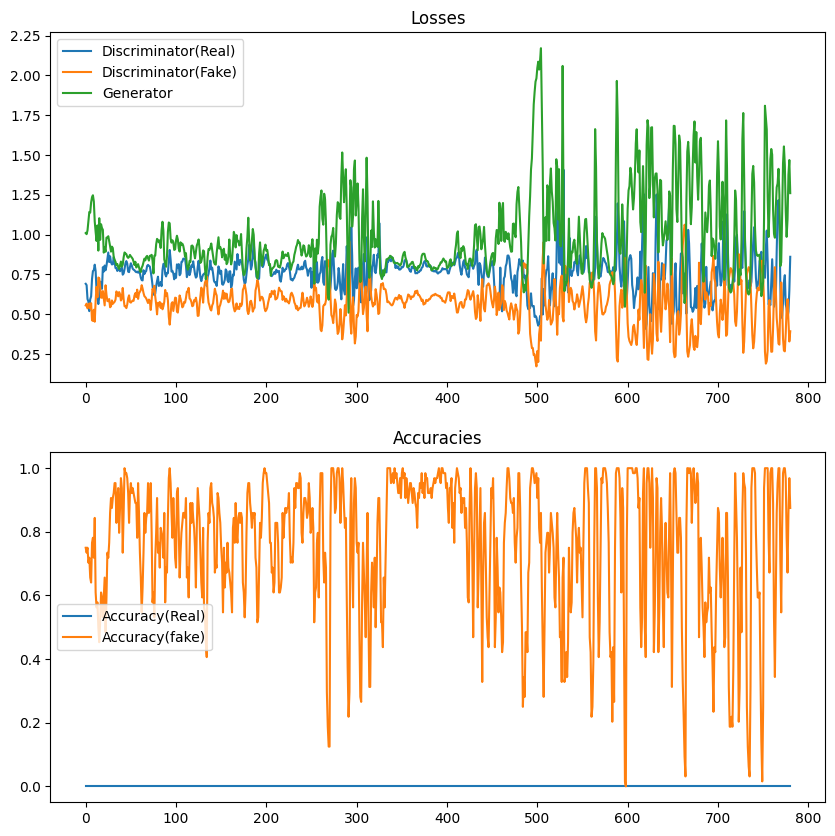

Iteration: 2
0.7958187
[[[0.4107551 ]
  [0.5255989 ]
  [0.5916651 ]
  [0.6495473 ]
  [0.6972766 ]
  [0.9567852 ]
  [1.1398365 ]
  [1.1554234 ]
  [1.0049307 ]
  [0.7990609 ]
  [0.7137164 ]
  [0.7003107 ]
  [0.66834044]
  [0.6756929 ]
  [0.70314276]
  [0.76460904]
  [0.8487952 ]
  [0.8772986 ]
  [0.89065063]
  [0.9206476 ]
  [0.8468038 ]
  [0.78795624]
  [0.7484132 ]
  [0.7146762 ]
  [0.7566472 ]
  [0.7209114 ]
  [0.78196234]
  [0.80780077]
  [0.8752007 ]
  [0.9478701 ]
  [0.9270529 ]
  [0.92847323]
  [0.9349343 ]
  [0.9507956 ]
  [0.85746044]
  [0.7986835 ]
  [0.7043401 ]
  [0.6515436 ]
  [0.63771266]
  [0.7235005 ]
  [0.7492726 ]
  [0.8386387 ]
  [0.8818184 ]
  [0.8688988 ]
  [0.8072297 ]
  [0.7814908 ]
  [0.76721144]
  [0.77908146]
  [0.8134127 ]
  [0.7944424 ]
  [0.7569234 ]
  [0.7139709 ]
  [0.734962  ]
  [0.73649967]
  [0.8060932 ]
  [0.8909605 ]
  [0.89199626]
  [0.84415835]
  [0.7830076 ]
  [0.688394  ]
  [0.6543049 ]
  [0.6547145 ]
  [0.69335276]
  [0.71822417]
  [0.8127671 ]
  

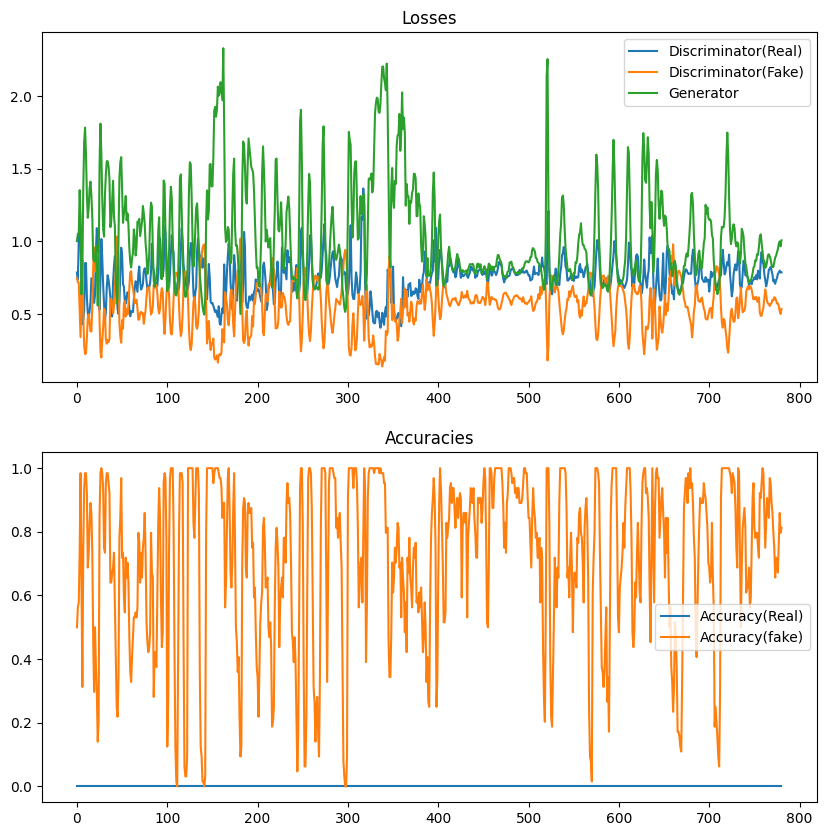

Iteration: 3
0.8604468
[[[0.48714954]
  [1.1418746 ]
  [0.87407887]
  [0.8419806 ]
  [0.851109  ]
  [0.79657054]
  [1.0339992 ]
  [1.2999793 ]
  [0.8571476 ]
  [0.7474792 ]
  [0.70898014]
  [0.6673558 ]
  [0.7092353 ]
  [0.7973846 ]
  [0.98897016]
  [1.1179354 ]
  [1.0833688 ]
  [1.3640404 ]
  [1.4225705 ]
  [0.9784584 ]
  [0.87059593]
  [0.8504379 ]
  [0.727862  ]
  [0.70389843]
  [0.6159317 ]
  [0.6102655 ]
  [0.6049703 ]
  [0.6127864 ]
  [0.73554826]
  [0.69133234]
  [0.6190309 ]
  [0.55702627]
  [0.60085744]
  [0.73849916]
  [0.8676262 ]
  [0.94759214]
  [0.9029565 ]
  [0.87806606]
  [0.8693569 ]
  [0.9787383 ]
  [1.0650448 ]
  [1.0068245 ]
  [1.0107932 ]
  [0.9223113 ]
  [0.906284  ]
  [0.7989141 ]
  [0.8663341 ]
  [0.87956095]
  [0.80370444]
  [0.8069916 ]
  [0.7295742 ]
  [0.7354178 ]
  [0.6687907 ]
  [1.0493243 ]
  [1.0575814 ]
  [0.9008887 ]
  [0.8025012 ]
  [0.8217814 ]
  [0.66898036]
  [1.2893323 ]
  [0.91502094]
  [1.0230801 ]
  [0.89032567]
  [0.97604907]
  [0.93716335]
  

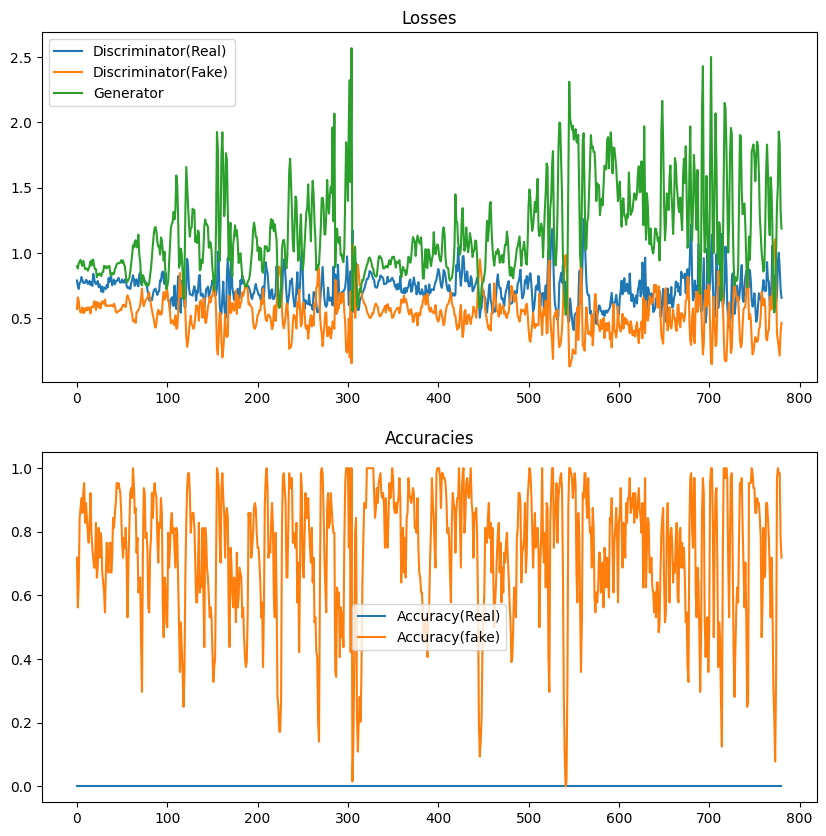

Iteration: 4
0.7686378
[[[0.9861821 ]
  [0.8004669 ]
  [0.7038373 ]
  [0.9808218 ]
  [0.7714197 ]
  [0.8504326 ]
  [0.84234977]
  [0.78143275]
  [0.        ]
  [0.        ]
  [1.0012126 ]
  [0.3917507 ]
  [0.8687083 ]
  [0.99838114]
  [0.6170188 ]
  [1.287843  ]
  [0.79938626]
  [1.1287787 ]
  [0.        ]
  [0.1247309 ]
  [1.496804  ]
  [0.70297706]
  [0.79614127]
  [0.35044476]
  [1.005621  ]
  [0.75468767]
  [1.0494375 ]
  [1.0445004 ]
  [0.9318856 ]
  [1.0398252 ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [1.7519592 ]
  [0.54911995]
  [1.4676987 ]
  [0.5375016 ]
  [0.6558522 ]
  [0.07684942]
  [1.4556859 ]
  [0.        ]
  [0.        ]
  [1.2554753 ]
  [0.82414204]
  [0.        ]
  [0.        ]
  [0.        ]
  [1.8323408 ]
  [0.        ]
  [2.9373116 ]
  [0.5265949 ]
  [1.0306445 ]
  [0.        ]
  [0.3273079 ]
  [1.2042763 ]
  [0.        ]
  [0.7833482 ]
  [0.26615858]
  [0.7843652 ]
  [0.9156092 ]
  [0.8521819 ]
  [1.0864048 ]
  [0.96982825]
  [0.8603356 ]
  

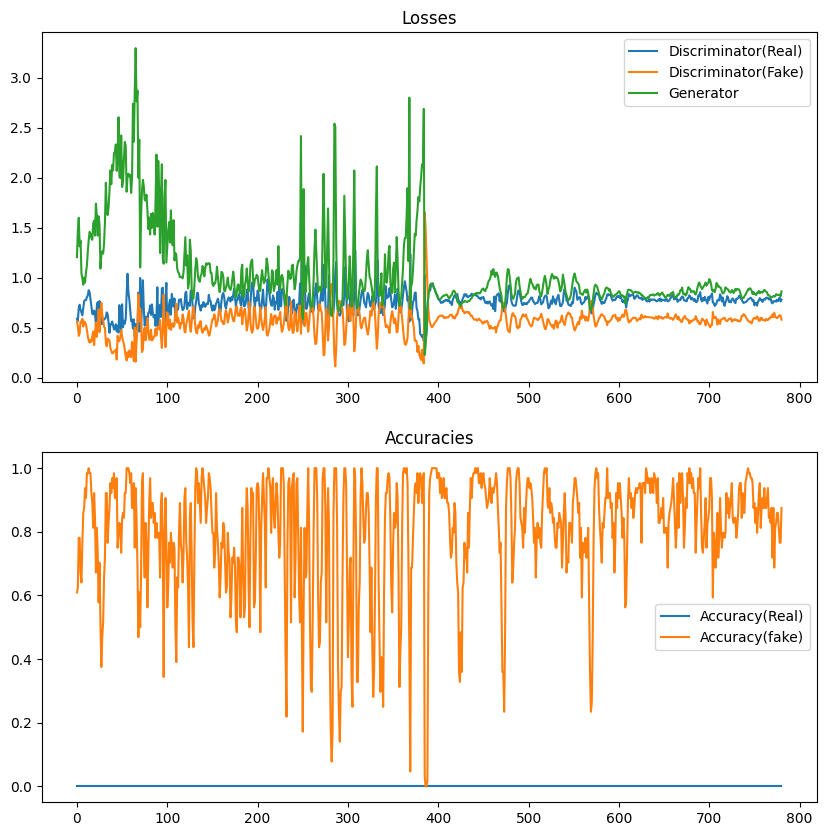

Iteration: 5
0.7316157
[[[0.6251609 ]
  [0.37177533]
  [0.9861268 ]
  [0.67291343]
  [0.6832839 ]
  [0.55629826]
  [0.        ]
  [1.89097   ]
  [0.9215621 ]
  [0.94676054]
  [0.7213006 ]
  [0.9640343 ]
  [0.95322394]
  [0.10149105]
  [0.67694116]
  [0.        ]
  [1.0556885 ]
  [0.70184284]
  [1.0455474 ]
  [0.71468437]
  [1.1318727 ]
  [0.13296983]
  [0.0609768 ]
  [1.3153821 ]
  [0.68862283]
  [0.49509895]
  [1.3666998 ]
  [0.        ]
  [1.4149367 ]
  [0.5769483 ]
  [0.95365894]
  [0.9501573 ]
  [0.9671558 ]
  [1.2418908 ]
  [0.844144  ]
  [0.7778296 ]
  [0.        ]
  [0.        ]
  [1.2701838 ]
  [0.8222292 ]
  [0.9108306 ]
  [0.54361236]
  [0.02058023]
  [1.0324724 ]
  [0.6921128 ]
  [0.8367809 ]
  [0.        ]
  [0.58531666]
  [0.7408587 ]
  [1.0337917 ]
  [0.8538948 ]
  [0.9211824 ]
  [0.8736383 ]
  [0.94936717]
  [0.7823785 ]
  [0.6528156 ]
  [0.        ]
  [1.4612521 ]
  [0.63160014]
  [1.0174308 ]
  [0.7643583 ]
  [0.83489907]
  [0.23535071]
  [0.        ]
  [0.        ]
  

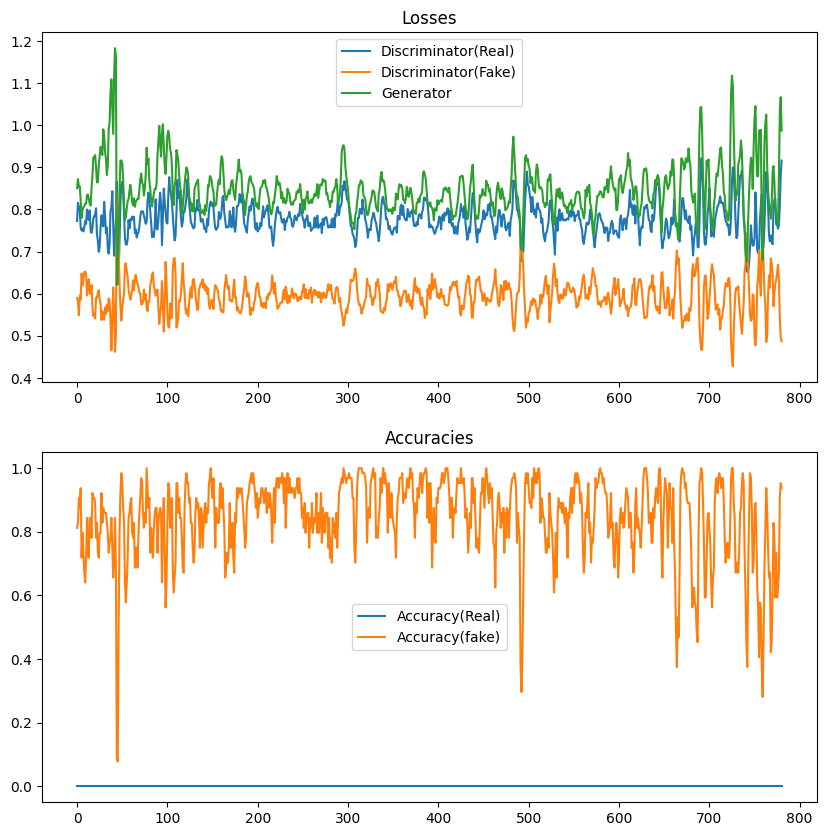

Iteration: 6
0.7187781
[[[0.23400018]
  [0.        ]
  [0.9452212 ]
  [0.63126737]
  [0.43124437]
  [0.43015504]
  [0.72724175]
  [0.7054231 ]
  [0.84413916]
  [0.42287093]
  [0.23763683]
  [1.0007458 ]
  [0.8307852 ]
  [0.9243354 ]
  [0.        ]
  [1.1631566 ]
  [0.46085852]
  [0.99171036]
  [0.77970326]
  [0.8731154 ]
  [0.50921106]
  [0.        ]
  [0.        ]
  [1.0841901 ]
  [0.82088315]
  [0.9597483 ]
  [0.7784794 ]
  [0.8407971 ]
  [0.727054  ]
  [0.8954262 ]
  [1.0046526 ]
  [0.6874461 ]
  [0.8978787 ]
  [0.883599  ]
  [0.48610187]
  [0.88418174]
  [0.54203534]
  [0.        ]
  [1.3716416 ]
  [1.8302965 ]
  [0.85400254]
  [0.9682733 ]
  [1.1481714 ]
  [0.90664643]
  [0.81791544]
  [0.869698  ]
  [0.6980622 ]
  [0.97251785]
  [0.728122  ]
  [0.6744023 ]
  [0.76018107]
  [0.5537048 ]
  [1.713423  ]
  [1.0650036 ]
  [1.081373  ]
  [1.0164278 ]
  [0.7987678 ]
  [0.62316215]
  [1.1034482 ]
  [0.48025876]
  [1.0023414 ]
  [0.59415245]
  [0.6320739 ]
  [0.        ]
  [0.0256944 ]
  

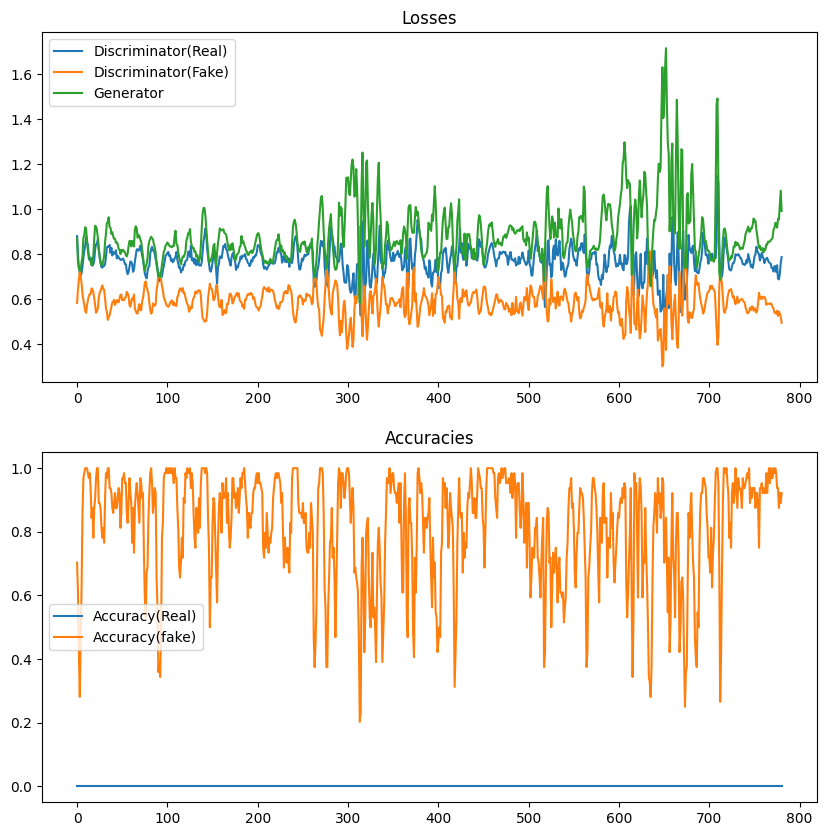

Iteration: 7
0.72990674
[[[0.3329526 ]
  [0.7986834 ]
  [0.        ]
  [0.98191607]
  [0.7417363 ]
  [0.94867086]
  [0.8764003 ]
  [0.7720324 ]
  [0.        ]
  [0.03596318]
  [0.        ]
  [0.        ]
  [0.94254005]
  [0.83433104]
  [0.9827    ]
  [0.9106668 ]
  [0.9448185 ]
  [1.0025796 ]
  [0.        ]
  [1.3041579 ]
  [0.61633694]
  [0.9419161 ]
  [1.1973289 ]
  [0.5774684 ]
  [1.5569742 ]
  [0.        ]
  [0.        ]
  [1.1910342 ]
  [0.5090771 ]
  [1.1477504 ]
  [1.1317272 ]
  [0.8092865 ]
  [0.84657586]
  [0.8695016 ]
  [0.7133776 ]
  [0.18656547]
  [0.9272392 ]
  [0.66927576]
  [0.        ]
  [0.        ]
  [0.90442765]
  [0.2434839 ]
  [1.1365361 ]
  [1.131085  ]
  [0.7010223 ]
  [0.94857025]
  [0.8112097 ]
  [1.3182316 ]
  [0.6770368 ]
  [0.5805776 ]
  [1.0928408 ]
  [0.67444026]
  [1.0354923 ]
  [0.7768613 ]
  [0.86627734]
  [1.0000917 ]
  [0.80754554]
  [0.78094375]
  [0.8608954 ]
  [0.        ]
  [0.9574926 ]
  [0.797218  ]
  [0.95238936]
  [0.804983  ]
  [0.74824023]
 

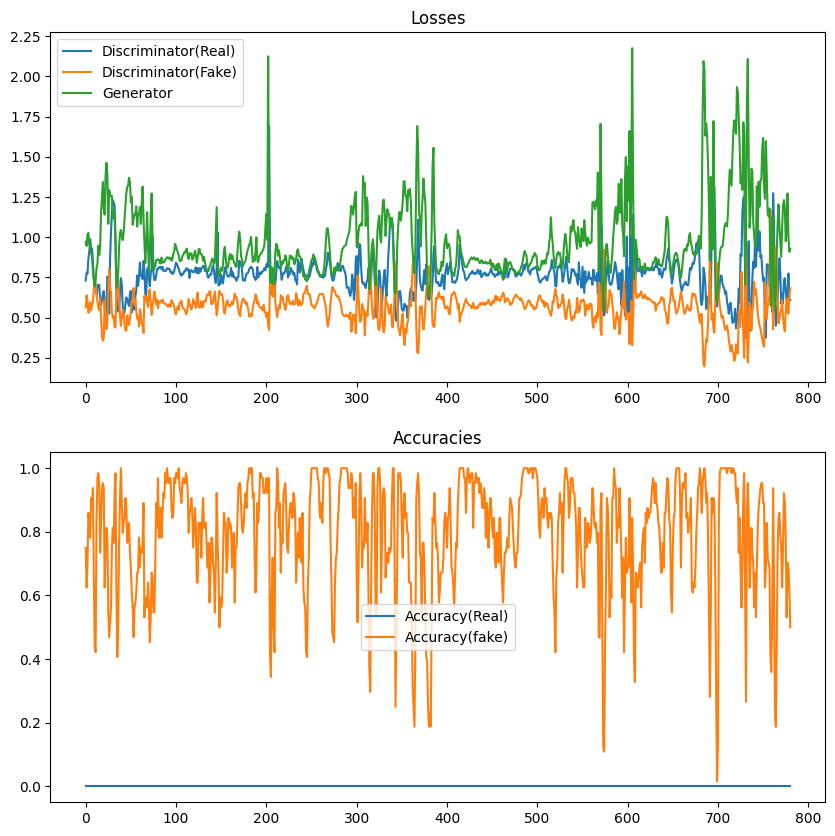

Iteration: 8


KeyboardInterrupt: 

In [7]:
tf.keras.utils.disable_interactive_logging()
gan.train(epochs=10)

In [ ]:
print((gan.generator.predict(np.random.normal(0, 1, (1, 50)))))
print((gan.generate_real_samples(1)[0]))

In [ ]:
x = gan.generator.predict(np.random.normal(0, 1, (10000, 50))).flatten()
y = np.ones(x.shape)
print(x.min(),x.max(), x.mean())
fig = plt.figure(figsize=(100, 100))
ax = fig.subplots()
vals = ax.hist(x, bins=1000, alpha=0.5, label="Generated", range=(-0.5,1.5))
ax.set_xlim([-0.5,1.5])
ax.set_ylim([0, vals[0].max() + 10000])
ax.set_xticks(np.arange(-0.5, 1.5, (1.5+0.5)/100))   
fig.show()

In [ ]:
print(np.argmin(x))

In [ ]:
print(x[42703])
